# DSC540 Project 2

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

## Rules
- Do not change the code already present in the notebook.
- Write your code under the corresponding questions where you see `# Code here`. You are encouraged to use more than one cell.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Clicking on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- For built-in function and methods you use from libraries, provide a very brief explanation of what they do.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name before beginning to code.

> **Once you have completed your project, and you are done with coding restart your kernel and run everything. Make sure it runs without errors.**
    - For this go to the very top where the tabs are located:
        - Kernel
            - Restart & Run All
    - We will check whether the code and results in this notebook is running fine.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML   
    3. The label predictions as csv file. -> See last question.

Good Luck!

### Amy Aumpansub

**Honor Pledge:**  
I pledge on my honor that I, **Amy Aumpansub**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 



## Project Description

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com).  
Lending Club connects people who need money (borrowers) with people who have money (investors).   
Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Check out more info on Lending Club on [Wikipedia](https://en.wikipedia.org/wiki/Lending_Club). Lending Club also had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016).

This dataset is from before they went public.

We will use lending data from 2007-2010 and will try to classify and predict whether or not the borrower paid back their loan in full. You will analyze the data file provided. 

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* not.fully.paid: Whether the loan was paid back or not.

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn
sklearn.__version__

'0.23.1'

In [3]:
pd.set_option('display.max_columns', 100)

### These are the packages I used

In [4]:
# Your package imports here
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import balanced_accuracy_score
%matplotlib inline

# Q1
- Read in the dataset `loan_data.csv`
- How many rows and variables are there?
- What are the unique values of `not.fully.paid`?
- `not.fully.paid` having a value of 1 means that the person who took the loan did not fully pay it back. What's the proportion of those people in the full dataset?

## Get the Data

**Use pandas to read loan_data.csv as a dataframe called loans.**

In [5]:
loans = pd.read_csv('loans_train.csv')
loans_outcome_not_known = pd.read_csv('loans_outcome_not_known.csv')

**Check out the info(), head(), and describe() methods on loans.**

In [6]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7478 entries, 0 to 7477
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      7478 non-null   int64  
 1   purpose            7478 non-null   object 
 2   int.rate           7478 non-null   float64
 3   installment        7478 non-null   float64
 4   log.annual.inc     7478 non-null   float64
 5   dti                7478 non-null   float64
 6   fico               7478 non-null   int64  
 7   days.with.cr.line  7478 non-null   float64
 8   revol.bal          7478 non-null   int64  
 9   revol.util         7478 non-null   float64
 10  inq.last.6mths     7478 non-null   int64  
 11  delinq.2yrs        7478 non-null   int64  
 12  pub.rec            7478 non-null   int64  
 13  not.fully.paid     7478 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 818.0+ KB


**- There are 7,478 rows and 14 variables.**

In [7]:
# YOUR CODE
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,credit_card,0.0800,101.85,10.596635,10.26,747,7560.000000,18467,30.9,3,0,0,0
1,1,all_other,0.1114,328.04,10.530495,14.13,722,1920.000000,6811,56.8,0,0,0,0
2,1,debt_consolidation,0.1324,676.20,11.289782,20.73,697,4080.000000,16805,64.1,0,0,0,0
3,1,debt_consolidation,0.1103,671.44,10.555813,15.72,722,3580.041667,31566,32.3,1,0,0,1
4,0,debt_consolidation,0.1545,244.21,10.308953,18.80,647,1950.041667,4587,41.0,2,0,0,0


In [8]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7.478000e+03,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000
mean,0.800615,0.123130,322.555320,10.936374,12.624763,710.180663,4543.688470,1.729738e+04,46.917329,1.618748,0.161942,0.063921,0.191629
std,0.399565,0.026727,208.950622,0.621971,6.896500,37.537593,2477.818646,3.601391e+04,28.982548,2.244517,0.530832,0.263576,0.393609
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,180.041667,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.105100,165.425000,10.555813,7.200000,682.000000,2820.000000,3.109000e+03,23.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122900,271.110000,10.933107,12.680000,707.000000,4110.041667,8.654000e+03,46.600000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.141100,441.600000,11.302204,17.992500,737.000000,5700.958333,1.827000e+04,70.775000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.180154,29.960000,822.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [9]:
#Cheack unique values of this column
loans["not.fully.paid"].unique()

array([0, 1])

**- The unique values are 0 and 1**

In [10]:
#Call the sum function for counting samples with the value of "not.fully.paid" = 1
#The function return 1433 which is the number of "not.fully.paid" values = 1.
# Divided by the total rows 7848 to get the proportion of the proportion of those people in the full dataset

count1 = (loans["not.fully.paid"] == 1).sum()
total =loans["not.fully.paid"].count()
prop = count1/total

print("The number of people who took the loan did not fully pay it back: " , count1)
print("Total people: " , total)
print("The proportion of those people in the full dataset: ", prop)


The number of people who took the loan did not fully pay it back:  1433
Total people:  7478
The proportion of those people in the full dataset:  0.19162877774806097


### Answers for Q1
- How many rows and variables are there?
    **There are 7,478 rows and 14 variales.**
- What are the unique values of not.fully.paid? **The unique values are 0 and 1**
- What's the proportion of those people in the full dataset? **The proportion is 0.1916 or 19.16%**

# Q2
- Visual and Exploratory Analysis
- Carry out the tasks given below

## Exploratory Data Analysis

- Let's do some data visualization! 
- You can use many different visualization libraries inclusing matplotlib, seaborn, pandasand many more. Feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

**Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

In [11]:
# Create an array with the colors 
colors = ["#FF0B04", "#4374B3"]
# Set color palette
sns.set_palette(sns.color_palette(colors))

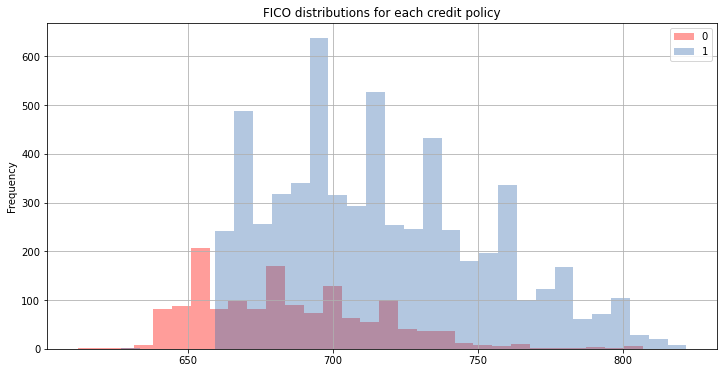

In [12]:
#YOUR CODE
plt.figure(figsize=(12,6))
loans.groupby('credit.policy')['fico'].plot(kind ='hist', bins=30, alpha = 0.4, title='FICO distributions for each credit policy', legend =True,grid = True)
plt.show()

- The majority of people who have a credit policy 1 has the fico approximately between 680 and 690.
- The majority of people who have a credit policy 0 the loan has the fico approximately between 650 and 660.

**Create a similar figure, except this time select by the not.fully.paid column.**

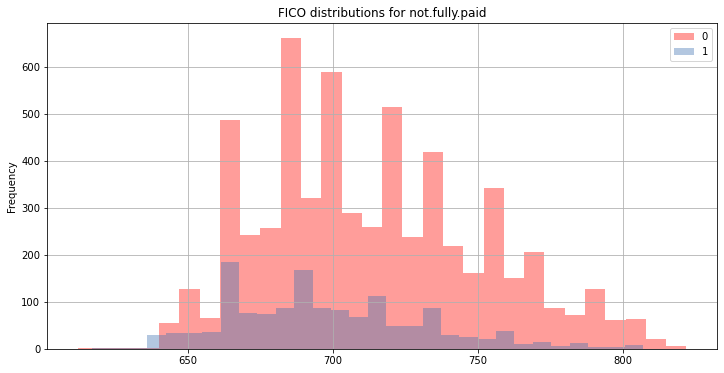

In [13]:
#YOUR CODE
plt.figure(figsize=(12,6))
loans.groupby('not.fully.paid')['fico'].plot(kind ='hist', bins=30, alpha = 0.4, title='FICO distributions for not.fully.paid', legend =True,grid = True)
plt.show()

- The majority of people who fully paid the loan has the fico approximately between 680 and 690.
- The majority of people who not fully paid the loan has the fico approximately  between 660 and 670.

**Create a countplot (bar plot showing counts using seaborn) that shows the counts of loans by purpose, with the color hue defined by `not.fully.paid`**

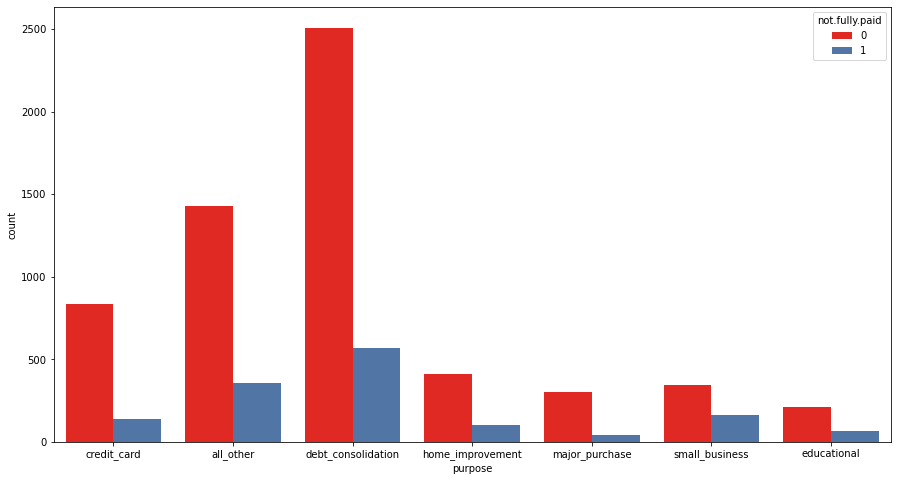

In [14]:
# YOUR CODE
plt.figure(figsize=(15,8))
# Create an array with the colors 
colors = ["#FF0B04", "#4374B3"]
# Set color palette
sns.set_palette(sns.color_palette(colors))
sns.countplot(data = loans, x='purpose', hue ='not.fully.paid')
plt.show()

- The purpose of debt consolidation has the most people who not fully paid the loan.
- On the contrary, the purpose of education has the least people who not fully paid the loan.

**Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

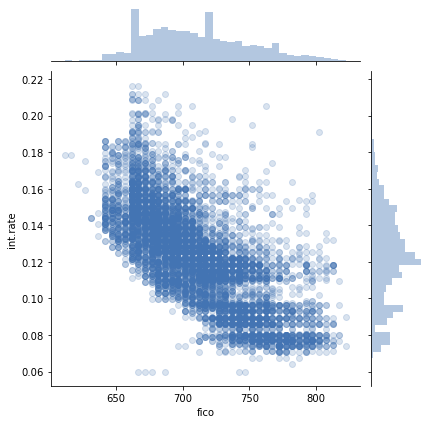

In [15]:
# YOUR CODE
sns.jointplot('fico', 'int.rate', data =loans, color="#4374B3", alpha =0.2)
plt.show()

- The higher fico scores, the lower interest rate.
- The lower fico scores, the higher interest rate.
- This is becuase the people with low fico score has more risk and is likely to not fully paid loan, so the interest rate needs to be higher to compensate the default risk.

**Create the following lmplots to see if the trend differed between `not.fully.paid` and `credit.policy`. Check the documentation for seaborn `lmplot()` if you can't figure out how to separate it into columns.**

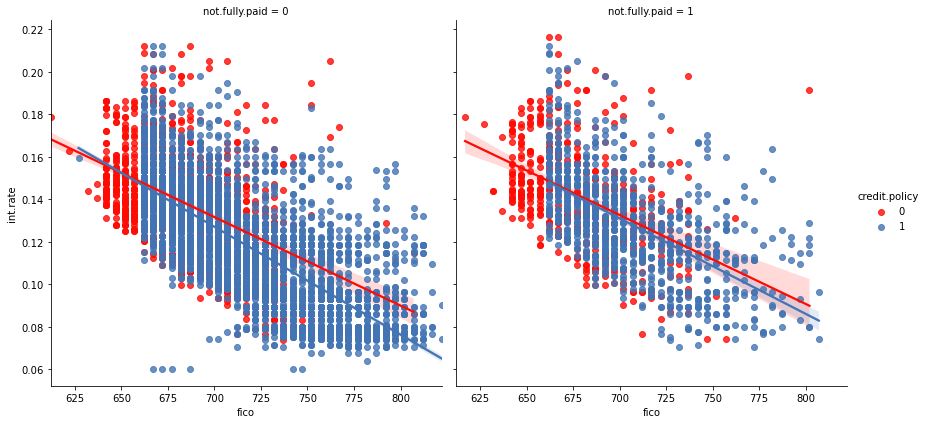

In [16]:
# YOUR CODE
# Create an array with the colors 
colors = ["#FF0B04", "#4374B3"]
# Set  color palette
sns.set_palette(sns.color_palette(colors))
sns.lmplot("fico", 'int.rate', data =loans, fit_reg=True, aspect=1, height=6, hue = 'credit.policy',col='not.fully.paid')
plt.show()

- Credit policy 0 is related to a low fico score regardless whether the loan is paid and not fully paid. The data with Credit policy 0 ranges between fico socore 625 to 675 for both paid and not fully paid
- Credit policy 1 is related to a medium to high fico scores. The data with Credit policy 1 ranges between fico socore 675 to 800 for both paid and not fully paid


# Q3

## Setting up the Data

Let's get ready to set up our data for our models!

**Check loans.info() again.**

In [17]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7478 entries, 0 to 7477
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      7478 non-null   int64  
 1   purpose            7478 non-null   object 
 2   int.rate           7478 non-null   float64
 3   installment        7478 non-null   float64
 4   log.annual.inc     7478 non-null   float64
 5   dti                7478 non-null   float64
 6   fico               7478 non-null   int64  
 7   days.with.cr.line  7478 non-null   float64
 8   revol.bal          7478 non-null   int64  
 9   revol.util         7478 non-null   float64
 10  inq.last.6mths     7478 non-null   int64  
 11  delinq.2yrs        7478 non-null   int64  
 12  pub.rec            7478 non-null   int64  
 13  not.fully.paid     7478 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 818.0+ KB


## Categorical Features

Notice that the **purpose** column is of categorical type.

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies().

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

> The same transformation needs to be aplied on every dataset. The easiest way would be to merge train and test (loans_outcome_not_known) sets, and to split after the transformation.

In [18]:
# YOUR CODE
cat_feats = ['purpose']

**Now you can use `pd.get_dummies(loans,columns=cat_feats)` to create a fixed larger dataframe that has new feature columns with dummy variables.**

In [19]:
# YOUR CODE
# I create dummies separately for each dataset
loans = pd.get_dummies(loans, columns=cat_feats)
loans_outcome_not_known = pd.get_dummies(loans_outcome_not_known, columns=cat_feats)

In [20]:
print(loans.shape)
loans.head(5)

(7478, 20)


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.0800,101.85,10.596635,10.26,747,7560.000000,18467,30.9,3,0,0,0,0,1,0,0,0,0,0
1,1,0.1114,328.04,10.530495,14.13,722,1920.000000,6811,56.8,0,0,0,0,1,0,0,0,0,0,0
2,1,0.1324,676.20,11.289782,20.73,697,4080.000000,16805,64.1,0,0,0,0,0,0,1,0,0,0,0
3,1,0.1103,671.44,10.555813,15.72,722,3580.041667,31566,32.3,1,0,0,1,0,0,1,0,0,0,0
4,0,0.1545,244.21,10.308953,18.80,647,1950.041667,4587,41.0,2,0,0,0,0,0,1,0,0,0,0


In [21]:
print(loans_outcome_not_known.shape)
loans_outcome_not_known.head(5)

(2100, 19)


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1324,540.96,10.596635,11.73,672,3210.000000,5671,55.1,0,0,0,0,0,1,0,0,0,0
1,0,0.1221,333.15,11.156193,15.82,707,5314.000000,107643,81.0,3,0,0,0,0,0,1,0,0,0
2,1,0.1218,166.50,10.753836,6.38,772,1440.000000,233,6.7,0,0,0,0,0,1,0,0,0,0
3,0,0.1461,124.12,10.239960,0.00,692,1530.041667,0,0.0,6,0,0,0,0,0,0,0,1,0
4,1,0.0800,156.69,10.434116,15.85,767,10170.000000,5748,12.3,0,1,0,0,1,0,0,0,0,0


## Train Test Split

Now its time to split our data into a training set and a validation set!  

The `not.fully.paid` variable is the one that we will try to predict.

**Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = loans.drop('not.fully.paid',axis=1)
y = loans['not.fully.paid']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=2020)

# Q4

## Decision Tree Model

Let's start by training a single decision tree first!


- Initiate the Decision Tree classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
- Using all the training data perform cross-validation:
    - Select the `min_samples_split` hyper-parameter and apply cross validation to find the best value.  
    - Select the `max_depth` hyper-parameter and apply cross validation to find the best value. 
    - Perform grid search where you check for combinations of these hyper-parameters.
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- For the best model:
    - Plot the decision tree of the best model
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score
    - Compare the results to the model with default paramters. Any change?

In [24]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

### Default Model

#### Initialize and fit the model 

In [25]:
# YOUR CODE
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

#### Compute Accuracy Scores (train & Test)

In [26]:
#Accuracy Train
pred_train = dt.predict(X_train)
print("Accuracy Scores (Train): ",metrics.accuracy_score(y_true = y_train, y_pred = pred_train))

#Accuracy Test
pred = dt.predict(X_val)
print("Accuracy Scores (Test): ",metrics.accuracy_score(y_true = y_val, y_pred = pred))

Accuracy Scores (Train):  1.0
Accuracy Scores (Test):  0.7116755793226381


#### Summary of Metrics

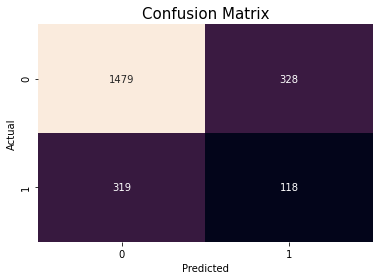

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1807
           1       0.26      0.27      0.27       437

    accuracy                           0.71      2244
   macro avg       0.54      0.54      0.54      2244
weighted avg       0.71      0.71      0.71      2244


Summary of Metrics:
Sensitivity 0.270023
Specificity 0.818484
Precision 0.264574
Accuracy 0.711676
Balanced Accuracy 0.544253
F1-score 0.267271


In [27]:
# Code here
# Create confusion metrics
confusion_matrix =  pd.crosstab(index=np.ravel(y_val), columns=pred.ravel(), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()
dt_met = metrics.classification_report(y_true = y_val, y_pred = pred,  output_dict=True)
print(metrics.classification_report(y_true = y_val, y_pred = pred))
print("\nSummary of Metrics:")
print("Sensitivity %f"%(dt_met['1']['recall']))
print("Specificity %f"%(dt_met['0']['recall']))
print("Precision %f"%(dt_met['1']['precision']))
print("Accuracy %f"%(dt_met['accuracy']))
print("Balanced Accuracy %f"%(balanced_accuracy_score(y_val, pred)))
print("F1-score %f"%(dt_met['1']['f1-score']))

#### Select min_samples_split

In [28]:
from sklearn.model_selection import cross_val_score
MS_list = [10, 50, 100, 200, 300, 500]
accuracy_valid = []
for ms in MS_list:
    dt = DecisionTreeClassifier(min_samples_split= ms, random_state = 42)
    # Code here
    dt.fit(X_train, y_train)
    pred_train = dt.predict(X_train)
    score_valid= cross_val_score(dt,X_train, y_train, scoring = "accuracy", cv =5 )
    accuracy_valid.append(score_valid.mean())
print("Accuracy score: ")
accuracy_valid

Accuracy score: 


[0.7166559833157103,
 0.7672877619932029,
 0.784102078048727,
 0.7948016823081883,
 0.802062343288025,
 0.8072219452464567]

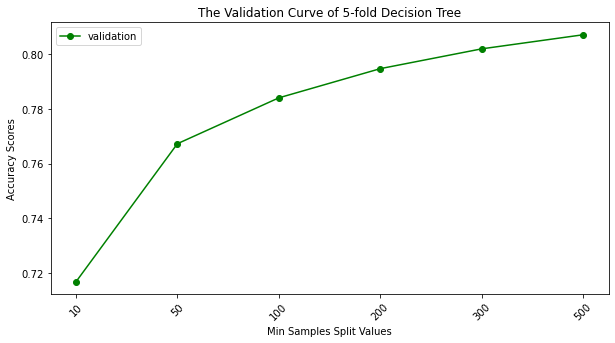

In [29]:
# Code here
plt.figure(figsize=(10,5))
plt.title("The Validation Curve of 5-fold Decision Tree")
plt.plot(accuracy_valid, 'go-',label = 'validation')
plt.xticks(np.arange(len(MS_list)), MS_list, rotation = 45)
plt.xlabel('Min Samples Split Values')
plt.ylabel('Accuracy Scores')
plt.legend()
plt.show()

**- Best min_samples_split = 500**

#### Select max_depth

In [30]:
MD_list = [2, 5, 10, 15, 20, 30]
accuracy_valid = []
for md in MD_list:
    dt = DecisionTreeClassifier(max_depth=md, random_state = 42)
    # Code here
    dt.fit(X_train, y_train)
    pred_train = dt.predict(X_train)
    score_valid= cross_val_score(dt,X_train, y_train, scoring = "accuracy", cv =5 )
    accuracy_valid.append(score_valid.mean())
print("Accuracy score: ")
accuracy_valid

Accuracy score: 


[0.8097057786884498,
 0.7974761724749397,
 0.765567833799931,
 0.7357614672532465,
 0.7051937521572151,
 0.7007995164185756]

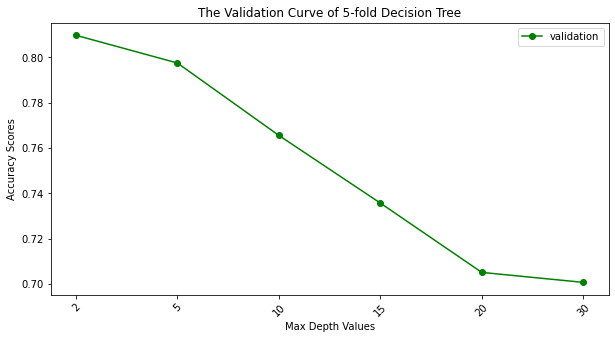

In [31]:
# Code here
plt.figure(figsize=(10,5))
plt.title("The Validation Curve of 5-fold Decision Tree")
plt.plot(accuracy_valid, 'go-',label = 'validation')
plt.xticks(np.arange(len(MD_list)), MD_list, rotation = 45)
plt.xlabel('Max Depth Values')
plt.ylabel('Accuracy Scores')
plt.legend()
plt.show()

**- Max Depth Values = 2**

#### Grid Search with scoring="balanced_accuracy"
- To account for the imbalanced class label, I use "balanced_accuracy" to find the best parameters.

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
MS_list = [10, 50, 100, 200, 300, 500]
MD_list = [2, 3, 4]
params = {'min_samples_split': MS_list,
         'max_depth': MD_list, 'random_state': [42]}

dt = DecisionTreeClassifier()
grid = GridSearchCV(estimator=dt, param_grid=params, cv=5, scoring="balanced_accuracy")

In [34]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_split': [10, 50, 100, 200, 300, 500],
                         'random_state': [42]},
             scoring='balanced_accuracy')

In [35]:
#Find the best params
grid.best_params_

{'max_depth': 4, 'min_samples_split': 100, 'random_state': 42}

In [36]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_split=100, random_state=42)

## Best parameters from Grid Search

#### Fit the best model

In [37]:
# YOUR CODE
dt = DecisionTreeClassifier(max_depth = 4, min_samples_split = 100, random_state = 42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=100, random_state=42)

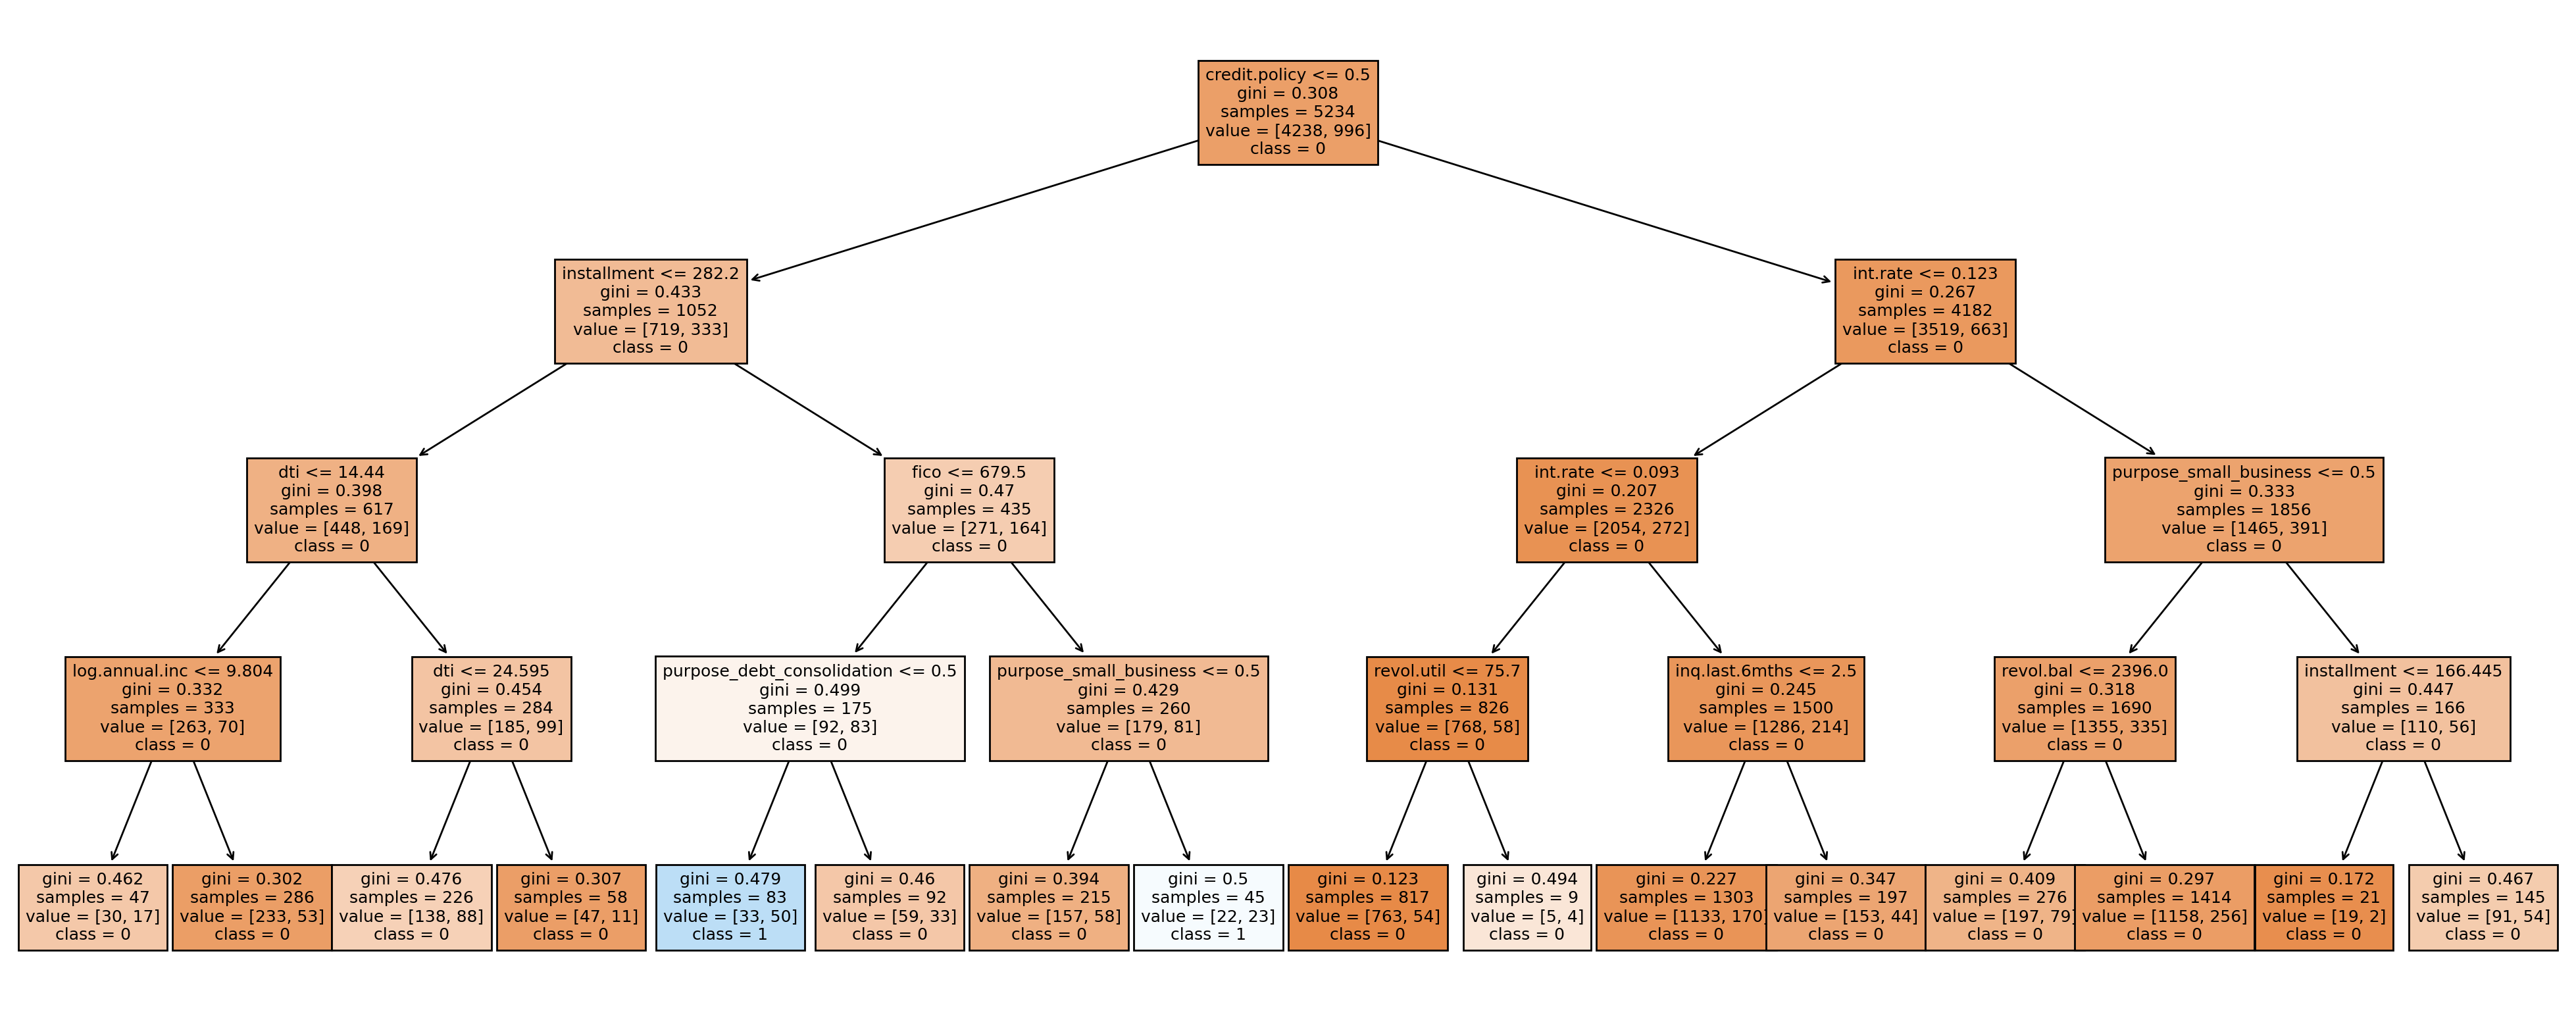

In [38]:
from sklearn import tree
bestDT = dt
fn = X_train.columns
cn = ['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (25,10), dpi=200)
tree.plot_tree(bestDT,feature_names = fn, class_names=cn, filled = True, fontsize=9);

#### Compute accuracy score

In [39]:
#Accuracy Train
pred_train = dt.predict(X_train)
print("Accuracy Scores (Train): ",metrics.accuracy_score(y_true = y_train, y_pred = pred_train))

#Accuracy Test
pred = dt.predict(X_val)
print("Accuracy Scores (Test): ",metrics.accuracy_score(y_true = y_val, y_pred = pred))

Accuracy Scores (Train):  0.8131448223156286
Accuracy Scores (Test):  0.803030303030303


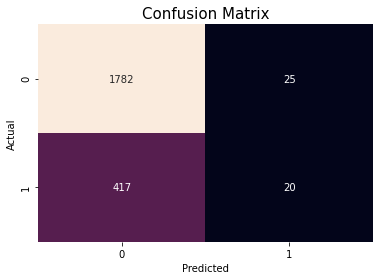

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1807
           1       0.44      0.05      0.08       437

    accuracy                           0.80      2244
   macro avg       0.63      0.52      0.49      2244
weighted avg       0.74      0.80      0.73      2244


Summary of Metrics:
Sensitivity 0.045767
Specificity 0.986165
Precision 0.444444
Accuracy 0.803030
Balanced Accuracy 0.515966
F1-score 0.082988


In [40]:
# Code here
# Create confusion metrics
confusion_matrix =  pd.crosstab(index=np.ravel(y_val), columns=pred.ravel(), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()
dt_met = metrics.classification_report(y_true = y_val, y_pred = pred,  output_dict=True)
print(metrics.classification_report(y_true = y_val, y_pred = pred))
print("\nSummary of Metrics:")
print("Sensitivity %f"%(dt_met['1']['recall']))
print("Specificity %f"%(dt_met['0']['recall']))
print("Precision %f"%(dt_met['1']['precision']))
print("Accuracy %f"%(dt_met['accuracy']))
print("Balanced Accuracy %f"%(balanced_accuracy_score(y_val, pred)))
print("F1-score %f"%(dt_met['1']['f1-score']))

### Summary for Q4:  
- The best model has higher accuracy and precision. The weighted avg accuracy, precision, recall, and f1 are also higher than the default model, so it performs better than the default model.
- However the recall and f1 for class 1 of the best model is still low, implying that the model still can't detect and predict the class 1 very well.
- This is because the GridSearch finds the best parameters with the highest balanced accuracy not recall as we specified in function.
- Comparing to the default model, the best model is less overfitting as the accuracy rate of train and test set are high and close to each other.

# Q5

## Random Forest model

- Initiate the Random Forest classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
- Using all the training data perform cross-validation:
    - Select the `min_samples_split` hyper-parameter and apply cross validation to find the best value.  
    - Select the `max_depth` hyper-parameter and apply cross validation to find the best value. 
    - Select the `n_estimators` hyper-parameter and apply cross validation to find the best value. 
    - Perform grid search where you check for combinations of these hyper-parameters.
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score
    - Compare the results to the model with default paramters. Any change?

### Default Model

In [41]:
from sklearn.ensemble import RandomForestClassifier

#### Initialize and fit the model

In [42]:
# YOUR CODE
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

#### Compute Accuracy Scores (Train & Test)

In [43]:
#Accuracy Train
pred_train = rf.predict(X_train)
print("Accuracy Scores (Train): ",metrics.accuracy_score(y_true = y_train, y_pred = pred_train))

#Accuracy Test
pred = rf.predict(X_val)
print("Accuracy Scores (Test): ",metrics.accuracy_score(y_true = y_val, y_pred = pred))

Accuracy Scores (Train):  1.0
Accuracy Scores (Test):  0.8043672014260249


#### Summary of Metrics

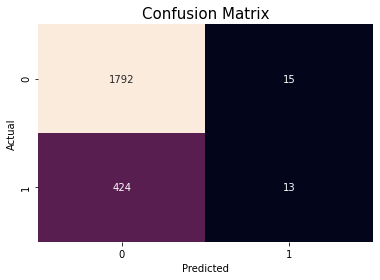

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1807
           1       0.46      0.03      0.06       437

    accuracy                           0.80      2244
   macro avg       0.64      0.51      0.47      2244
weighted avg       0.74      0.80      0.73      2244


Summary of Metrics:
Sensitivity 0.029748
Specificity 0.991699
Precision 0.464286
Accuracy 0.804367
Balanced Accuracy 0.510724
F1-score 0.055914


In [44]:
# Code here
# Create confusion metrics
confusion_matrix =  pd.crosstab(index=np.ravel(y_val), columns=pred.ravel(), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()
rf_met = metrics.classification_report(y_true = y_val, y_pred = pred,  output_dict=True)
print(metrics.classification_report(y_true = y_val, y_pred = pred))
print("\nSummary of Metrics:")
print("Sensitivity %f"%(rf_met['1']['recall']))
print("Specificity %f"%(rf_met['0']['recall']))
print("Precision %f"%(rf_met['1']['precision']))
print("Accuracy %f"%(rf_met['accuracy']))
print("Balanced Accuracy %f"%(balanced_accuracy_score(y_val, pred)))
print("F1-score %f"%(rf_met['1']['f1-score']))

#### Select min_samples_split

In [45]:
MS_list = [10, 50, 100, 200, 300, 500]
accuracy_valid = []
for ms in MS_list:
    rf = RandomForestClassifier(min_samples_split= ms , random_state = 42)
    # Code here
    rf.fit(X_train, y_train)
    pred_train = rf.predict(X_train)
    score_valid= cross_val_score(rf,X_train, y_train, scoring = "accuracy", cv =5 )
    accuracy_valid.append(score_valid.mean())
print("Accuracy score: ")
accuracy_valid

Accuracy score: 


[0.8060756308199153,
 0.8081774203268559,
 0.8093237347533974,
 0.8097057786884498,
 0.8097057786884498,
 0.8097057786884498]

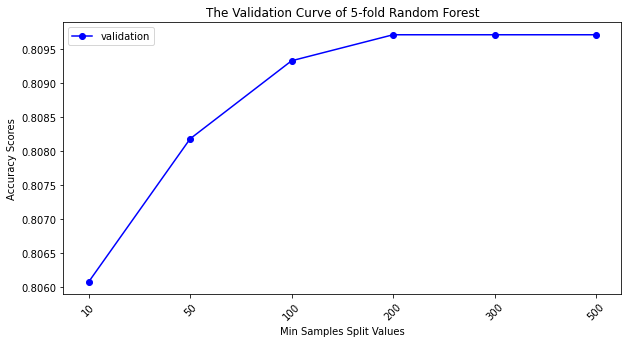

In [46]:
# Code here
plt.figure(figsize=(10,5))
plt.title("The Validation Curve of 5-fold Random Forest")
plt.plot(accuracy_valid, 'bo-',label = 'validation')
plt.xticks(np.arange(len(MS_list)), MS_list, rotation = 45)
plt.xlabel('Min Samples Split Values')
plt.ylabel('Accuracy Scores')
plt.legend()
plt.show()

#### - Best min_samples_split = 200

#### Select max_depth

In [47]:
MD_list = [2, 5, 10, 15, 20, 30]
accuracy_valid = []
for md in MD_list:
    rf = RandomForestClassifier(max_depth=md, random_state = 42)
    # Code here
    rf.fit(X_train, y_train)
    pred_train = rf.predict(X_train)
    score_valid= cross_val_score(rf,X_train, y_train, scoring = "accuracy", cv =5 )
    accuracy_valid.append(score_valid.mean())
print("Accuracy score")
accuracy_valid

Accuracy score


[0.8097057786884498,
 0.8095147567209235,
 0.8074129672139831,
 0.8070311059003142,
 0.8081765072199364,
 0.8058838783668534]

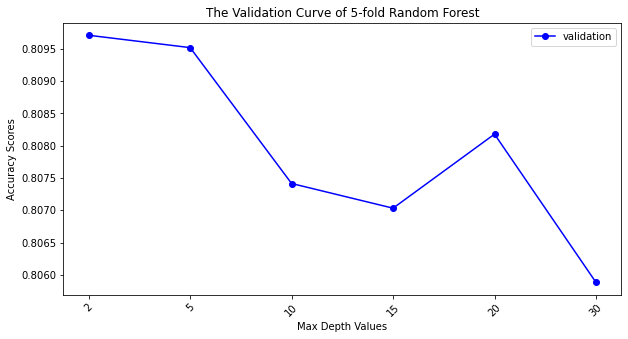

In [48]:
# Code here
plt.figure(figsize=(10,5))
plt.title("The Validation Curve of 5-fold Random Forest")
plt.plot(accuracy_valid, 'bo-',label = 'validation')
plt.xticks(np.arange(len(MD_list)), MD_list, rotation = 45)
plt.xlabel('Max Depth Values')
plt.ylabel('Accuracy Scores')
plt.legend()
plt.show()

#### - Best Max Depth Value = 2

#### Number of estimators

In [49]:
ET_list = [10, 50, 100, 200, 300, 400]
accuracy_valid = []
for et in ET_list:
    rf = RandomForestClassifier(n_estimators=et, random_state = 42)
    # Code here
    rf.fit(X_train, y_train)
    pred_train = rf.predict(X_train)
    score_valid= cross_val_score(rf,X_train, y_train, scoring = "accuracy", cv =5 )
    accuracy_valid.append(score_valid.mean())
print("Accuracy score")
accuracy_valid

Accuracy score


[0.7972878898281716,
 0.8055025649173363,
 0.8074127845925989,
 0.8081777855696235,
 0.806648879343878,
 0.807604171802893]

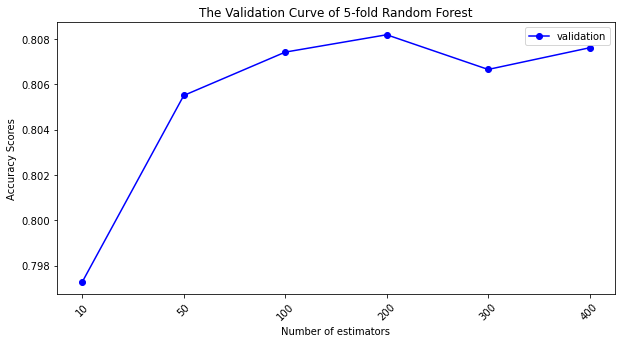

In [50]:
# Code here
plt.figure(figsize=(10,5))
plt.title("The Validation Curve of 5-fold Random Forest")
plt.plot(accuracy_valid, 'bo-',label = 'validation')
plt.xticks(np.arange(len(ET_list)), ET_list, rotation = 45)
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy Scores')
plt.legend()
plt.show()

#### - Best Number of estimators = 200

#### Grid Search

In [51]:
MS_list = [10, 50, 100, 200, 300, 500]
ET_list = [10, 50, 100, 200, 300, 400]
MD_list = [2, 5, 10, 15, 20, 30]
params = {'n_estimators': ET_list,
          'min_samples_split': MS_list,
         'max_depth': MD_list, 'random_state': [42]}

rf = RandomForestClassifier()
grid = GridSearchCV(estimator=rf, param_grid=params, verbose=1, cv=5,scoring="balanced_accuracy", n_jobs=-1)

In [52]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  4.9min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 15, 20, 30],
                         'min_samples_split': [10, 50, 100, 200, 300, 500],
                         'n_estimators': [10, 50, 100, 200, 300, 400],
                         'random_state': [42]},
             scoring='balanced_accuracy', verbose=1)

In [53]:
grid.best_params_

{'max_depth': 30,
 'min_samples_split': 10,
 'n_estimators': 10,
 'random_state': 42}

In [54]:
grid.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_split=10, n_estimators=10,
                       random_state=42)

### Best parameters from Grid Search

#### Fit the best model

In [55]:
# YOUR CODE
rf = RandomForestClassifier(max_depth=30, min_samples_split=10, n_estimators=10, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_split=10, n_estimators=10,
                       random_state=42)

#### Compute accuracy score

In [56]:
#Accuracy Train
pred_train = rf.predict(X_train)
print("Accuracy Scores (Train): ",metrics.accuracy_score(y_true = y_train, y_pred = pred_train))

#Accuracy Test
pred = rf.predict(X_val)
print("Accuracy Scores (Test): ",metrics.accuracy_score(y_true = y_val, y_pred = pred))

Accuracy Scores (Train):  0.9138326327856324
Accuracy Scores (Test):  0.7972370766488414


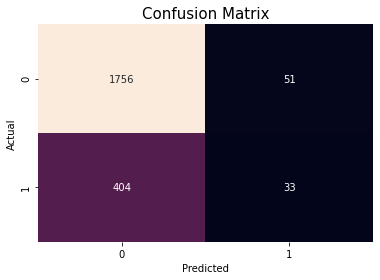

              precision    recall  f1-score   support

           0       0.81      0.97      0.89      1807
           1       0.39      0.08      0.13       437

    accuracy                           0.80      2244
   macro avg       0.60      0.52      0.51      2244
weighted avg       0.73      0.80      0.74      2244


Summary of Metrics:
Sensitivity 0.075515
Specificity 0.971776
Precision 0.392857
Accuracy 0.797237
Balanced Accuracy 0.523646
F1-score 0.126679


In [57]:
# Code here
# Create confusion metrics
confusion_matrix =  pd.crosstab(index=np.ravel(y_val), columns=pred.ravel(), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()
rf_met = metrics.classification_report(y_true = y_val, y_pred = pred,  output_dict=True)
print(metrics.classification_report(y_true = y_val, y_pred = pred))
print("\nSummary of Metrics:")
print("Sensitivity %f"%(rf_met['1']['recall']))
print("Specificity %f"%(rf_met['0']['recall']))
print("Precision %f"%(rf_met['1']['precision']))
print("Accuracy %f"%(rf_met['accuracy']))
print("Balanced Accuracy %f"%(balanced_accuracy_score(y_val, pred)))
print("F1-score %f"%(rf_met['1']['f1-score']))

### Summary for Q5

- The best model has higher accuracy. The recall and f1 are also higher than the default model, so it performs better than the default model.
- However the recall and f1 for class 1 of the best model is still low, implying that the model still can't detect and predict the class 1 very well. 
- This is because the GridSearch finds the best parameters with the highest balanced accuracy not recall as we specified in function.
- Comparing to the default model, the best model is less overfitting as the accuracy rate of train and test set are high and close to each other.

# Q6

## Adaboost model

- Initiate the Random Forest classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
- Using all the training data perform cross-validation:
    - Select the `learning_rate` hyper-parameter and apply cross validation to find the best value.  
    - Select the `n_estimators` hyper-parameter and apply cross validation to find the best value. 
    - Perform grid search where you check for combinations of these hyper-parameters.
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score
    - Compare the results to the model with default paramters. Any change?

In [58]:
from sklearn.ensemble import AdaBoostClassifier

### Default Model

In [59]:
# YOUR CODE
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)

AdaBoostClassifier()

#### Compute Accuracy Scores (train & Test)

In [60]:
#Accuracy Train
pred_train = ab.predict(X_train)
print("Accuracy Scores (Train): ",metrics.accuracy_score(y_true = y_train, y_pred = pred_train))

#Accuracy Test
pred = ab.predict(X_val)
print("Accuracy Scores (Test): ",metrics.accuracy_score(y_true = y_val, y_pred = pred))

Accuracy Scores (Train):  0.815246465418418
Accuracy Scores (Test):  0.803475935828877


#### Summary of Metrics

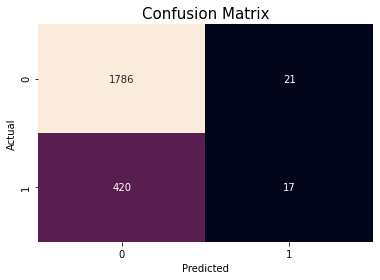

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1807
           1       0.45      0.04      0.07       437

    accuracy                           0.80      2244
   macro avg       0.63      0.51      0.48      2244
weighted avg       0.74      0.80      0.73      2244


Summary of Metrics:
Sensitivity 0.038902
Specificity 0.988379
Precision 0.447368
Accuracy 0.803476
Balanced Accuracy 0.513640
F1-score 0.071579


In [61]:
# Code here
# Create confusion metrics
confusion_matrix =  pd.crosstab(index=np.ravel(y_val), columns=pred.ravel(), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()
ab_met = metrics.classification_report(y_true = y_val, y_pred = pred,  output_dict=True)
print(metrics.classification_report(y_true = y_val, y_pred = pred))
print("\nSummary of Metrics:")
print("Sensitivity %f"%(ab_met['1']['recall']))
print("Specificity %f"%(ab_met['0']['recall']))
print("Precision %f"%(ab_met['1']['precision']))
print("Accuracy %f"%(ab_met['accuracy']))
print("Balanced Accuracy %f"%(balanced_accuracy_score(y_val, pred)))
print("F1-score %f"%(ab_met['1']['f1-score']))

#### Learning_rate

In [62]:
from sklearn.model_selection import cross_val_score
LR_list = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
accuracy_valid = []
for lr in LR_list:
    ab = AdaBoostClassifier(learning_rate=lr, random_state = 42)
    # Code here
    ab.fit(X_train, y_train)
    pred_train = ab.predict(X_train)
    score_valid= cross_val_score(ab,X_train, y_train, scoring = "accuracy", cv =5 )
    accuracy_valid.append(score_valid.mean())
print("Accuracy score: ")
accuracy_valid

Accuracy score: 


[0.8097057786884498,
 0.8097057786884498,
 0.8097057786884498,
 0.8097057786884498,
 0.8097057786884498,
 0.8077951937704194,
 0.804354789519724]

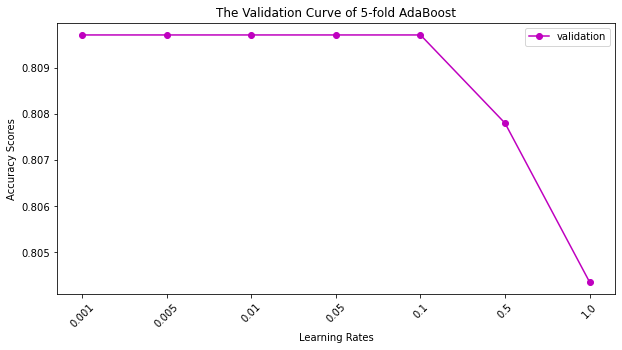

In [63]:
# Code here
plt.figure(figsize=(10,5))
plt.title("The Validation Curve of 5-fold AdaBoost")
plt.plot(accuracy_valid, 'mo-',label = 'validation')
plt.xticks(np.arange(len(LR_list)), LR_list, rotation = 45)
plt.xlabel('Learning Rates')
plt.ylabel('Accuracy Scores')
plt.legend()
plt.show()

#### - The best learning rates are  0.001, 0.005, 0.01, 0.05, 0.1

#### Number of Estimators

In [64]:
ET_list = [10, 50, 100, 200, 300, 400]
accuracy_valid = []
for et in ET_list:
    ab = AdaBoostClassifier(n_estimators=et, random_state = 42)
    # Code here
    ab.fit(X_train, y_train)
    pred_train = ab.predict(X_train)
    score_valid= cross_val_score(ab,X_train, y_train, scoring = "accuracy", cv =5 )
    accuracy_valid.append(score_valid.mean())
print("Accuracy score")
accuracy_valid

Accuracy score


[0.8068397186900202,
 0.804354789519724,
 0.8034005927890121,
 0.8012986206606877,
 0.7997702622990935,
 0.8007257373794927]

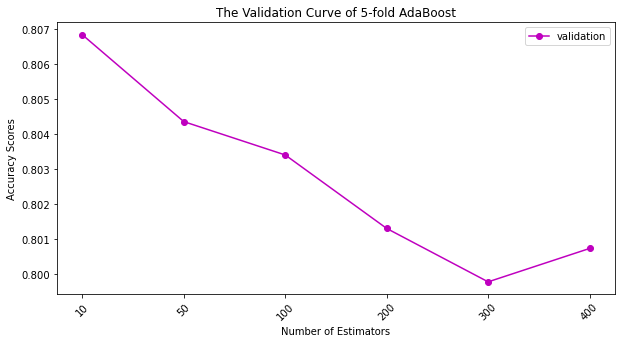

In [65]:
# Code here
plt.figure(figsize=(10,5))
plt.title("The Validation Curve of 5-fold AdaBoost")
plt.plot(accuracy_valid, 'mo-',label = 'validation')
plt.xticks(np.arange(len(ET_list)), ET_list, rotation = 45)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy Scores')
plt.legend()
plt.show()

#### -The best Number of Estimators is 10

#### Grid Search

In [66]:
LR_list = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
ET_list = [10, 50, 100, 200, 300, 400]
params = {'n_estimators': ET_list,
         'learning_rate': LR_list, 'random_state': [42]}

ab = AdaBoostClassifier()
grid = GridSearchCV(estimator=ab, param_grid=params, cv=5, verbose =1, scoring="balanced_accuracy", n_jobs=-1)

In [67]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:  1.0min finished


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5,
                                           1.0],
                         'n_estimators': [10, 50, 100, 200, 300, 400],
                         'random_state': [42]},
             scoring='balanced_accuracy', verbose=1)

In [68]:
grid.best_params_

{'learning_rate': 1.0, 'n_estimators': 400, 'random_state': 42}

In [69]:
grid.best_estimator_

AdaBoostClassifier(n_estimators=400, random_state=42)

### Best parameters from Grid Search

In [70]:
# YOUR CODE
ab = AdaBoostClassifier(learning_rate=1.0, n_estimators=400, random_state = 42)
ab.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=400, random_state=42)

In [71]:
#Accuracy Train
pred_train = ab.predict(X_train)
print("Accuracy Scores (Train): ",metrics.accuracy_score(y_true = y_train, y_pred = pred_train))

#Accuracy Test
pred = ab.predict(X_val)
print("Accuracy Scores (Test): ",metrics.accuracy_score(y_true = y_val, y_pred = pred))

Accuracy Scores (Train):  0.827283148643485
Accuracy Scores (Test):  0.8003565062388592


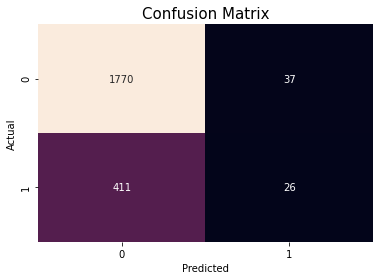

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1807
           1       0.41      0.06      0.10       437

    accuracy                           0.80      2244
   macro avg       0.61      0.52      0.50      2244
weighted avg       0.73      0.80      0.74      2244


Summary of Metrics:
Sensitivity 0.059497
Specificity 0.979524
Precision 0.412698
Accuracy 0.800357
Balanced Accuracy 0.519510
F1-score 0.104000


In [72]:
# Code here
# Create confusion metrics
confusion_matrix =  pd.crosstab(index=np.ravel(y_val), columns=pred.ravel(), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()
ab_met = metrics.classification_report(y_true = y_val, y_pred = pred,  output_dict=True)
print(metrics.classification_report(y_true = y_val, y_pred = pred))
print("\nSummary of Metrics:")
print("Sensitivity %f"%(ab_met['1']['recall']))
print("Specificity %f"%(ab_met['0']['recall']))
print("Precision %f"%(ab_met['1']['precision']))
print("Accuracy %f"%(ab_met['accuracy']))
print("Balanced Accuracy %f"%(balanced_accuracy_score(y_val, pred)))
print("F1-score %f"%(ab_met['1']['f1-score']))

### Summary for Q6

- The best model has higher accuracy. The recall, and f1 are also higher than the default model, so it performs better than the default model.
- However the recall and f1 for class 1 of the best model is still low, implying that the model still can't detect and predict the class 1 very well.
- This is because the GridSearch finds the best parameters with the highest balanced accuracy not recall as we specified in function.
- Both default model and the best model from Adaboost are not overfitting as the accuracy rate of train and test set are high and close to each other.

# Q7

## Gradient Boost model

- Initiate the Random Forest classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
- Using all the training data perform cross-validation:
    - Select the `learning_rate` hyper-parameter and apply cross validation to find the best value.  
    - Select the `n_estimators` hyper-parameter and apply cross validation to find the best value. 
    - Perform grid search where you check for combinations of these hyper-parameters.
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score
    - Compare the results to the model with default paramters. Any change?

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

### Default Model

In [74]:
# YOUR CODE
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

#### Compute Accuracy Scores (train & Test)

In [75]:
#Accuracy Train
pred_train = gb.predict(X_train)
print("Accuracy Scores (Train): ",metrics.accuracy_score(y_true = y_train, y_pred = pred_train))

#Accuracy Test
pred = gb.predict(X_val)
print("Accuracy Scores (Test): ",metrics.accuracy_score(y_true = y_val, y_pred = pred))

Accuracy Scores (Train):  0.8291937332823844
Accuracy Scores (Test):  0.8057040998217468


#### Summary of Metrics

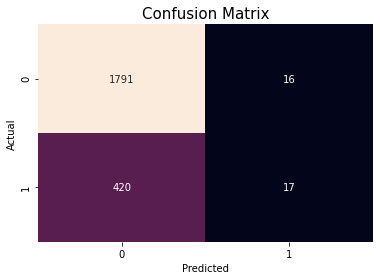

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1807
           1       0.52      0.04      0.07       437

    accuracy                           0.81      2244
   macro avg       0.66      0.52      0.48      2244
weighted avg       0.75      0.81      0.73      2244


Summary of Metrics:
Sensitivity 0.038902
Specificity 0.991146
Precision 0.515152
Accuracy 0.805704
Balanced Accuracy 0.515024
F1-score 0.072340


In [76]:
# Code here
# Create confusion metrics
confusion_matrix =  pd.crosstab(index=np.ravel(y_val), columns=pred.ravel(), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()
gb_met = metrics.classification_report(y_true = y_val, y_pred = pred,  output_dict=True)
print(metrics.classification_report(y_true = y_val, y_pred = pred))
print("\nSummary of Metrics:")
print("Sensitivity %f"%(gb_met['1']['recall']))
print("Specificity %f"%(gb_met['0']['recall']))
print("Precision %f"%(gb_met['1']['precision']))
print("Accuracy %f"%(gb_met['accuracy']))
print("Balanced Accuracy %f"%(balanced_accuracy_score(y_val, pred)))
print("F1-score %f"%(gb_met['1']['f1-score']))

#### Learning_rate

In [77]:
from sklearn.model_selection import cross_val_score
LR_list = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
accuracy_valid = []
for lr in LR_list:
    gb = GradientBoostingClassifier(learning_rate=lr, random_state =42)
    # Code here
    gb.fit(X_train, y_train)
    pred_train = gb.predict(X_train)
    score_valid= cross_val_score(gb,X_train, y_train, scoring = "accuracy", cv =5 )
    accuracy_valid.append(score_valid.mean())
print("Accuracy score: ")
accuracy_valid

Accuracy score: 


[0.8097057786884498,
 0.8097057786884498,
 0.8095147567209235,
 0.807985850495178,
 0.8070309232789304,
 0.7741685704945935,
 0.7462757108080813]

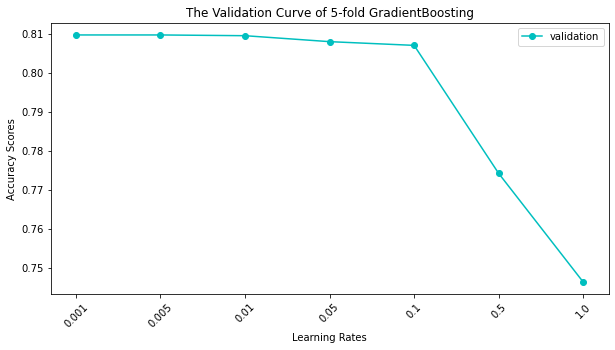

In [78]:
# Code here
plt.figure(figsize=(10,5))
plt.title("The Validation Curve of 5-fold GradientBoosting")
plt.plot(accuracy_valid, 'co-',label = 'validation')
plt.xticks(np.arange(len(LR_list)), LR_list, rotation = 45)
plt.xlabel('Learning Rates')
plt.ylabel('Accuracy Scores')
plt.legend()
plt.show()

#### The best  learning rates are 0.001, 0.005

#### Number of Estimators

In [79]:
ET_list = [10, 50, 100, 200, 300, 400]
accuracy_valid = []
for et in ET_list:
    gb = GradientBoostingClassifier(n_estimators=et, random_state =42)
    gb.fit(X_train, y_train)
    pred_train = ab.predict(X_train)
    score_valid= cross_val_score(gb,X_train, y_train, scoring = "accuracy", cv =5 )
    accuracy_valid.append(score_valid.mean())
print("Accuracy score")
accuracy_valid

Accuracy score


[0.8095147567209235,
 0.8072217626250728,
 0.8070309232789304,
 0.80359216262069,
 0.7982426344230351,
 0.7948033259006431]

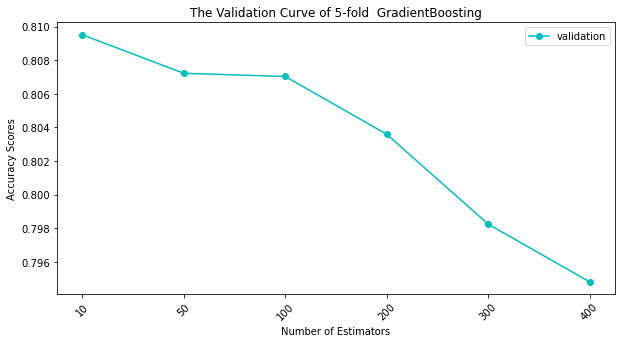

In [80]:
# Code here
plt.figure(figsize=(10,5))
plt.title("The Validation Curve of 5-fold  GradientBoosting")
plt.plot(accuracy_valid, 'co-',label = 'validation')
plt.xticks(np.arange(len(ET_list)), ET_list, rotation = 45)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy Scores')
plt.legend()
plt.show()

#### The best number of estimators is 10

### Grid Search

In [81]:
LR_list = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
ET_list = [10, 50, 100, 200, 300, 400]
params = {'n_estimators': ET_list,
         'learning_rate': LR_list, 'random_state': [42]}

gb = GradientBoostingClassifier()
grid = GridSearchCV(estimator=gb, param_grid=params, cv=5, verbose =1, scoring="balanced_accuracy", n_jobs=-1)

In [82]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:  1.7min finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5,
                                           1.0],
                         'n_estimators': [10, 50, 100, 200, 300, 400],
                         'random_state': [42]},
             scoring='balanced_accuracy', verbose=1)

In [83]:
grid.best_params_

{'learning_rate': 1.0, 'n_estimators': 400, 'random_state': 42}

In [84]:
grid.best_estimator_

GradientBoostingClassifier(learning_rate=1.0, n_estimators=400, random_state=42)

### Best parameters from Grid Search

In [85]:
# YOUR CODE
gb = GradientBoostingClassifier(learning_rate=1.0, n_estimators=400, random_state =42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, n_estimators=400, random_state=42)

In [86]:
#Accuracy Train
pred_train = gb.predict(X_train)
print("Accuracy Scores (Train): ",metrics.accuracy_score(y_true = y_train, y_pred = pred_train))

#Accuracy Test
pred = gb.predict(X_val)
print("Accuracy Scores (Test): ",metrics.accuracy_score(y_true = y_val, y_pred = pred))

Accuracy Scores (Train):  1.0
Accuracy Scores (Test):  0.7415329768270945


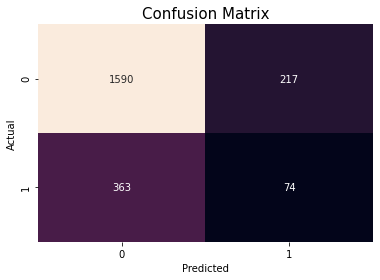

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1807
           1       0.25      0.17      0.20       437

    accuracy                           0.74      2244
   macro avg       0.53      0.52      0.52      2244
weighted avg       0.71      0.74      0.72      2244


Summary of Metrics:
Sensitivity 0.169336
Specificity 0.879911
Precision 0.254296
Accuracy 0.741533
Balanced Accuracy 0.524624
F1-score 0.203297


In [87]:
# Code here
# Create confusion metrics
confusion_matrix =  pd.crosstab(index=np.ravel(y_val), columns=pred.ravel(), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()
gb_met = metrics.classification_report(y_true = y_val, y_pred = pred,  output_dict=True)
print(metrics.classification_report(y_true = y_val, y_pred = pred))
print("\nSummary of Metrics:")
print("Sensitivity %f"%(gb_met['1']['recall']))
print("Specificity %f"%(gb_met['0']['recall']))
print("Precision %f"%(gb_met['1']['precision']))
print("Accuracy %f"%(gb_met['accuracy']))
print("Balanced Accuracy %f"%(balanced_accuracy_score(y_val, pred)))
print("F1-score %f"%(gb_met['1']['f1-score']))

### Summary for Q7

- The best model has higher Balanced Accuracy, recall, and f1 are also higher than the default model, so it performs better than the default model in overall.
- The recall and f1 for class 1 of the best model is about 20% higher than those of default model, implying that the best model still can detect and predict the class 1 better than the default model.
- Comparing to the default model, the best model is more overfitting as the accuracy rate of train and test set are apart from each other.

# Q8

- Using the Decision Tree, Random Forest, Adaboost, and Gradient Boosting classifer models:
    - Think of other ways of improving the accuracy and list at least two possibilities.
    - Implement both of the methods you proposed. 
    - Is the model recall increasing? Why do you think this might have helped?
    - If both of them did not improve, comment on why this might have been the case.
    - Optional: Apply different things and see if the recall is improving

## Proposed 3 Methods to solve Imbalanced Class and improve recall & precision
### - Method 1: Increase K in StratifiedKFold and useF1 score (no weights) for GridSearchCV
### - Method 2: Use recall score for GridSearchCV to improve class 1 detection
### - Method 3: Specify class weight (put more weight  for minority class 1)

In [88]:
print("class 0:", (y_train.values == 0).sum())
print("class 1:", (y_train.values == 1).sum())
print("propotion of class 1: " ,996/(996+4238))

class 0: 4238
class 1: 996
propotion of class 1:  0.19029423003439053


### Method 1:  Increase K in StratifiedKFold and use F1 score for GridSearchCV

- Before we specified the scoring as blanced accuracy in GridSearch CV but the prediction power for class 1 is still weak. so now we should do Stratified Cross-Validation with F1 score to improve the performance on predicting class 1 and ensure all the labels are equally represented.
- I choose F1 because it can blend precision and recall rates.
- Stratified Cross-Validation with higher K folds provides better accuracy which the bias is lower, so it is better than a single train test split and ensure the proper representation of each class
- To find the best hyper-parameter, the model will fit with Stratified 7-folds Cross-validation with F1 score in GridSearchCV.

In [89]:
# YOUR CODE
skf = StratifiedKFold(n_splits=7, random_state=42)
skf.get_n_splits(X_train, y_train)

7

In [90]:
MD_list = [ 5, 10, 15, 20, 30]
MS_list = [ 10,30, 50, 100, 200]
ET_list = [ 50,100,200, 400]
LR_list = [ 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]

#Decision tree
params_dt = {'min_samples_split': MS_list, 'max_depth': MD_list, 'random_state': [42]}
dt = DecisionTreeClassifier()
grid_dt= GridSearchCV(estimator=dt, param_grid=params_dt, scoring='f1', cv=skf, verbose =1, n_jobs=-1)

#Random Forest
params_rf = {'min_samples_split': MS_list, 'max_depth': MD_list, 'n_estimators': ET_list, 'random_state': [42]}
rf = RandomForestClassifier()
grid_rf= GridSearchCV(estimator=rf, param_grid=params_rf, scoring='f1', cv=skf, verbose =1, n_jobs=-1)

#Adaboost
params_ab = {'learning_rate': LR_list,'n_estimators': ET_list, 'random_state': [42]}
ab = AdaBoostClassifier()
grid_ab= GridSearchCV(estimator=ab, param_grid=params_ab, scoring='f1', cv=skf, verbose =1, n_jobs=-1)

#Gradient Boosting
params_gb = {'learning_rate': LR_list,'n_estimators': ET_list, 'random_state': [42]}
gb = GradientBoostingClassifier()
grid_gb= GridSearchCV(estimator=gb, param_grid=params_gb, scoring='f1', cv=skf, verbose =1, n_jobs=-1)

In [91]:
grid_dt.fit(X_train, y_train)#Decision tree
grid_rf.fit(X_train, y_train)#Random Forest
grid_ab.fit(X_train, y_train)#Adaboost
grid_gb.fit(X_train, y_train)#Gradient Boosting

Fitting 7 folds for each of 25 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 151 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 7 folds for each of 100 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:  4.2min finished


Fitting 7 folds for each of 24 candidates, totalling 168 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   56.6s finished


Fitting 7 folds for each of 24 candidates, totalling 168 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:  1.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=42, shuffle=False),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5],
                         'n_estimators': [50, 100, 200, 400],
                         'random_state': [42]},
             scoring='f1', verbose=1)

In [92]:
print(grid_dt.best_params_)
print(grid_rf.best_params_)
print(grid_ab.best_params_)
print(grid_gb.best_params_)

{'max_depth': 20, 'min_samples_split': 10, 'random_state': 42}
{'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 50, 'random_state': 42}
{'learning_rate': 0.5, 'n_estimators': 400, 'random_state': 42}
{'learning_rate': 0.5, 'n_estimators': 400, 'random_state': 42}


In [93]:
dt = DecisionTreeClassifier(max_depth = 20, min_samples_split = 10, random_state =42)#Decision tree
rf = RandomForestClassifier(max_depth = 20, min_samples_split = 10, n_estimators= 50, random_state =42)#Random Forest
ab = AdaBoostClassifier(learning_rate=0.5, n_estimators=400, random_state =42)#Adaboost
gb = GradientBoostingClassifier(learning_rate=0.5, n_estimators=400, random_state =42)#Gradient Boosting

In [94]:
def evaluateModel(name,clf, score):
    clf.fit(X_train, np.ravel(y_train))
    predicted = clf.predict(X_val)
    confusion_matrix =  pd.crosstab(index=np.ravel(y_val), columns=predicted.ravel(), rownames=['Expected'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
    accuracy = np.round(metrics.accuracy_score(y_val , predicted),3)
    plt.title(name + " " + " StratifiedKFold with " + score, fontsize = 15)
    plt.show()
    print (metrics.classification_report(y_val,predicted))

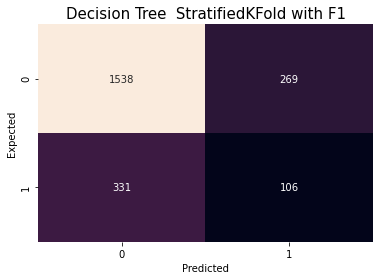

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1807
           1       0.28      0.24      0.26       437

    accuracy                           0.73      2244
   macro avg       0.55      0.55      0.55      2244
weighted avg       0.72      0.73      0.72      2244



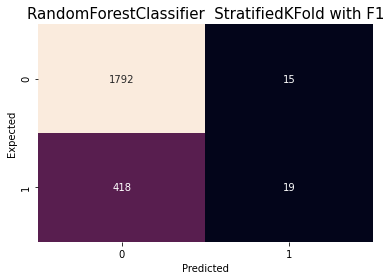

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1807
           1       0.56      0.04      0.08       437

    accuracy                           0.81      2244
   macro avg       0.68      0.52      0.49      2244
weighted avg       0.76      0.81      0.73      2244



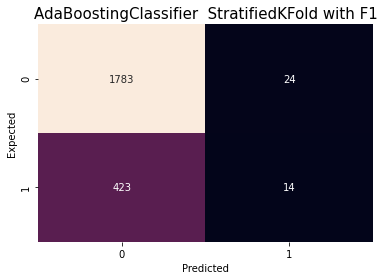

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1807
           1       0.37      0.03      0.06       437

    accuracy                           0.80      2244
   macro avg       0.59      0.51      0.47      2244
weighted avg       0.72      0.80      0.73      2244



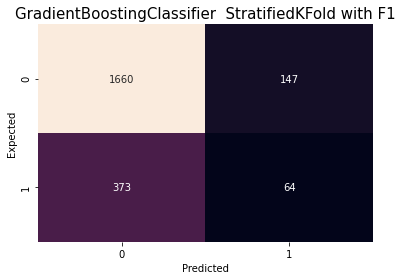

              precision    recall  f1-score   support

           0       0.82      0.92      0.86      1807
           1       0.30      0.15      0.20       437

    accuracy                           0.77      2244
   macro avg       0.56      0.53      0.53      2244
weighted avg       0.72      0.77      0.73      2244



In [95]:
#create an array of classifiers
names = ["Decision Tree", "RandomForestClassifier", "AdaBoostingClassifier", "GradientBoostingClassifier"]
classifiers= [dt,rf,ab, gb]

#loop through the classifiers
for name, clf in zip(names, classifiers):
    evaluateModel(name,clf, score='F1')

### Summary Method 1

- Comparing the new model to the previous model, the  accuracy rate with Stratified cross validation with F1 Score is higher and reliable as it also ensured the proper representation of each class in sample set.
- The F1 score, recall, and precision rate of the new models have improved from the previous model which do not use Stratified CV and F1 scoring in GridSerachCv
- The new model of Decison Tree and Dradient Boosting performs better in predicting class 1 as they gives better F1, Precision, recall.
- However, the recall from Random Forest and Adaboost model is pretty low, so we will tune the params with recall scoring in the next method.

### Method 2: StratifiedKFold with recall for GridSearchCV

- Before we specify the F1 scoring in GridSearch CV but it can moderately improve the prediction for class 1 so now we should do Stratified Cross-Validation with recall score to improve the performance on predicting class 1 and ensure all the labels are equally represented.
- I choose recall score because the recall from Random Forest and Adaboost model is pretty low, so we will tune the params with recall scoring.

In [96]:
# YOUR CODE
skf = StratifiedKFold(n_splits=7, random_state=42)
skf.get_n_splits(X_train, y_train)

7

In [97]:
MD_list = [ 5, 10, 15, 20, 30]
MS_list = [ 10,30, 50, 100, 200]
ET_list = [ 50,100,200, 400]
LR_list = [ 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]

#Decision tree
params_dt = {'min_samples_split': MS_list, 'max_depth': MD_list, 'random_state': [42]}
dt = DecisionTreeClassifier()
grid_dt= GridSearchCV(estimator=dt, param_grid=params_dt, scoring="recall", cv=skf, verbose =1, n_jobs=-1)

#Random Forest
params_rf = {'min_samples_split': MS_list, 'max_depth': MD_list, 'n_estimators': ET_list, 'random_state': [42]}
rf = RandomForestClassifier()
grid_rf= GridSearchCV(estimator=rf, param_grid=params_rf, scoring="recall", cv=skf, verbose =1, n_jobs=-1)

#Adaboost
params_ab = {'learning_rate': LR_list,'n_estimators': ET_list, 'random_state': [42]}
ab = AdaBoostClassifier()
grid_ab= GridSearchCV(estimator=ab, param_grid=params_ab, scoring="recall", cv=skf, verbose =1, n_jobs=-1)

#Gradient Boosting
params_gb = {'learning_rate': LR_list,'n_estimators': ET_list, 'random_state': [42]}
gb = GradientBoostingClassifier()
grid_gb= GridSearchCV(estimator=gb, param_grid=params_gb, scoring="recall", cv=skf, verbose =1, n_jobs=-1)

In [ ]:
grid_dt.fit(X_train, y_train)#Decision tree
grid_rf.fit(X_train, y_train)#Random Forest
grid_ab.fit(X_train, y_train)#Adaboost
grid_gb.fit(X_train, y_train)#Gradient Boosting

Fitting 7 folds for each of 25 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 151 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 7 folds for each of 100 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.4min


In [ ]:
print(grid_dt.best_params_)
print(grid_rf.best_params_)
print(grid_ab.best_params_)
print(grid_gb.best_params_)

In [ ]:
dt = DecisionTreeClassifier(max_depth = 30, min_samples_split = 10, random_state =42)#Decision tree
rf = RandomForestClassifier(max_depth = 20, min_samples_split = 10, n_estimators= 50, random_state =42)#Random Forest
ab = AdaBoostClassifier(learning_rate=0.5, n_estimators=400, random_state =42)#Adaboost
gb = GradientBoostingClassifier(learning_rate=0.5, n_estimators=400, random_state =42)#Gradient Boosting

In [ ]:
#create an array of classifiers
names = ["Decision Tree", "RandomForestClassifier", "AdaBoostingClassifier", "GradientBoostingClassifier"]
classifiers= [dt,rf,ab, gb]

#loop through the classifiers
for name, clf in zip(names, classifiers):
    evaluateModel(name,clf, score = 'Recall')

### Summary Method 2
- Comparing the new models to the previous models, only params of decision tree and random forest are different when performing gridsearch with recall instead of f1.
- The recall is still not improved much, so we will specify Class Weight in the next method to check for the best weight and to solve the imbalanced class problem.

### Method 3:  Compute and Specify Class Weight (Applicable for Decision Tree and Random Forest)

- To solve the imbalanced class, we can computed the class_weight using the sklearn.utils
- Then, we will specify different class_weights in params for gridSerach so that the higher class-weight means you want to put more emphasis on a class. We will put more weight on the class 1 relative to class 0

In [ ]:
# YOUR CODE
skf = StratifiedKFold(n_splits=7, random_state=40)
skf.get_n_splits(X_train, y_train)

In [ ]:
# Compute class_weights
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
print(class_weights)

In [ ]:
CW_list = [{ 0:0.5, 1: 1.5},{0:1, 1:1.5},{0:1, 1:2.5} ]
MD_list = [ 5, 10, 15, 20, 30]
MS_list = [ 10,30, 50, 100, 200]
ET_list = [ 50,100,200, 400]
LR_list = [ 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]

#Decision tree with 'f1'
params_dt_f1 = {'min_samples_split': MS_list, 'max_depth': MD_list, "class_weight": CW_list, 'random_state': [42]}
dt_f1 = DecisionTreeClassifier(class_weight='balanced')
grid_dt_f1= GridSearchCV(estimator=dt, param_grid=params_dt_f1, scoring='f1', cv=skf, verbose =1, n_jobs=-1)

#Random Forest with 'f1'
params_rf_f1 = {'min_samples_split': MS_list, 'max_depth': MD_list, 'n_estimators': ET_list, "class_weight": CW_list, 'random_state': [42]}
rf_f1 = RandomForestClassifier()
grid_rf_f1= GridSearchCV(estimator=rf, param_grid=params_rf_f1, scoring='f1', cv=skf, verbose =1, n_jobs=-1)


In [ ]:
grid_dt_f1.fit(X_train, y_train)#Decision tree
grid_rf_f1.fit(X_train, y_train)#Random Forest

In [ ]:
print(grid_dt_f1.best_params_)
print(grid_rf_f1.best_params_)

In [ ]:
dt_new_f1 = DecisionTreeClassifier(max_depth = 20, min_samples_split = 200, class_weight= {0: 0.5, 1: 1.5}, random_state =42 )#Decision tree f1
rf_new_f1 = RandomForestClassifier(max_depth = 15, min_samples_split = 200, n_estimators= 50, class_weight= {0: 0.5, 1: 1.5}, random_state =42 )#Random Forest f1

In [ ]:
#create an array of classifiers
names = ["Decision Tree", "RandomForestClassifier"]
classifiers= [dt_new_f1, rf_new_f1 ]
#loop through the classifiers
for name, clf in zip(names, classifiers):
    evaluateModel(name,clf, score='Class Weight and F1')

### Summary Method 3

- Comparing the new model to the previous model,  The F1 score, recall, recall, and precision rate of the new models have improved from the previous which do not compute class weight and specifiy in gridsearch. 
- The recall of each new model increased over % from the previous models.
- These implies the better prediction of class 1 of the new models with class-weight
- Thus, the new models with class weight gives better recall for hyper-parameter tuning. We focus on class 1 which is the minority class (only account for 20% of dataset) so we need to put higher class-weight  to put more emphasis on a class 1. We will put more weight on the class 1 (weight 1.5) relative to class 0 (weight0.5)

# Q9

- Choose the best fitted model for each of teh classifiers (1 model for each of Decision Tree, Random Forest, Adaboost, and Gradient Boosting)
- Create a table summarizing results on the test set:
    - Create confusion matrix for each model
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
        - Recall (Sensitivity)
        - Specificity
        - Precision
        - Balanced Accuracy
        - F1 Score

### The best models 

- The best models came from Q8 with the uses of  Stratified CV, class weight, F1 score for GridSearch.
- Comparing to the all fitted models, the best models may have a higher recall, f1-score, precision rate which implies that these models can perform well in prediction class 1 which is the foucsed class of our analysis. The purposed methods in Q8 can help solve the imbalanced class problem in our training set.
- As a results, it also improves the recall, f1, and precision rates

#### Refit the best models

In [ ]:
# YOUR CODE
dt_best = DecisionTreeClassifier(max_depth = 20, min_samples_split = 200, class_weight= {0: 0.5, 1: 1.5}, random_state =42 )#Decision tree f1
rf_best = RandomForestClassifier(max_depth = 15, min_samples_split = 200, n_estimators= 50, class_weight= {0: 0.5, 1: 1.5}, random_state =42 )#Random Forest f1
ab_best = AdaBoostClassifier(learning_rate=0.5, n_estimators=400, random_state =42)#Adaboost
gb_best = GradientBoostingClassifier(learning_rate=0.5, n_estimators=400, random_state =42)#Gradient Boosting

#### Create a table summarizing results on the test set

In [ ]:
def evaluateBestModel(name,clf):
    clf.fit(X_train, np.ravel(y_train))
    predicted = clf.predict(X_val)
    confusion_matrix =  pd.crosstab(index=np.ravel(y_val), columns=predicted.ravel(), rownames=['Expected'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
    accuracy = np.round(metrics.accuracy_score(y_val , predicted),3)
    plt.title(name + " " , fontsize = 15)
    plt.show()
    print (metrics.classification_report(y_val,predicted))
    met = metrics.classification_report(y_val,predicted,output_dict=True)
    print("\nSummary of Metrics:")
    print("Sensitivity %f"%(met['1']['recall']))
    print("Specificity %f"%(met['0']['recall']))
    print("Precision %f"%(met['1']['precision']))
    print("Accuracy %f"%(met['accuracy']))
    print("Balanced Accuracy %f"%(balanced_accuracy_score(y_val, pred)))
    print("F1-score %f"%(met['1']['f1-score']))

In [ ]:
#create an array of classifiers
names = ["Decision Tree", "RandomForestClassifier (Best Model)", "AdaBoostingClassifier", "GradientBoostingClassifier"]
classifiers= [dt_best,rf_best,ab_best, gb_best]

#loop through the classifiers
for name, clf in zip(names, classifiers):
    evaluateBestModel(name,clf)

### Summary for Q9
- all best models in Q9 has an improved recall, sensitivity, and f1 score and had a moderatly high accuracy rate. Out of 4 best models, the random forest model performs the best as it can predict both class 1 and class 0 and has the high recall, sensitivity, and f1 score.

# Q10

- Choose a winner model.
- Make predictions on the hold-out set whose outcome variables are not known (data we imported as: `loans_outcome_not_known`).
- Write the code below to make predictions with this model. At the end it should output the prediction of the labels.
- Save the predictions in a csv file
- There should be a single column in the csv file.
- The column header should be 'predictions'
- Your prediction performance will be calculated and a ranking will be performed 

### The winner model is chosen from Q9: 
#### RandomForestClassifier(max_depth = 15, min_samples_split = 200, n_estimators= 50, class_weight= {0: 0.5, 1: 1.5}, random_state =42)

Comparing the best model to the previous model, the train accuracy rate with Stratified cross validation with F1 Score is slightly better. The F1 score, recall, and precision rate of all trees have improved from the previous model which do not use Stratified CV and scoring in GridSerachCv The best model  RandomForest performs better in predicting class 1. Although Decison Tree has a higher recall but the overall accuracy of RandomForest is better, so I picked the RandomForest as the best model

In [ ]:
X = loans_outcome_not_known
X.head()

In [ ]:
# YOUR CODE
winner = RandomForestClassifier(max_depth = 15, min_samples_split = 200, n_estimators= 50, class_weight= {0: 0.5, 1: 1.5}, random_state =42 )#Random Forest f1
winner.fit(X_train, np.ravel(y_train))
predicted = clf.predict(X)

In [ ]:
data = {'predictions': predicted}
df = pd.DataFrame(data) 
df.to_csv('dsc540_predictions_Amy_Aumpansub.csv', index=False)

# Great Job!